In [127]:
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
%store -r dataframes
dataframes_to_vis = dataframes

In [174]:
# draw line graph for each column per city per two weeks for the whole period
cities = ['sydney']#, 'melbourne']
years = ['2020']#, '2021', '2022']
columns_to_vis = ['Segment', 'WC']#, 'Analytic', 'cogproc', 'emo_pos', 'emo_anx', 'emo_anger', 'emo_sad', 'family', 'friend']
columns_to_keep = ['utc_datetime_str', 'Segment', 'WC', 'Analytic', 'cogproc', 'emo_pos', 'emo_anx', 'emo_anger',
                   'emo_sad', 'family', 'friend']


def each_city_each_year_each_stat_vis(dataframes_vis, columns_vis, period):

    # for each city we have
    for city in cities:
        # for each year we have
        for year in years:
            # create a dataframe for particular city and year
            df = dataframes_vis[city + '_' + year]

            # for each column we want to visualize
            for column in columns_vis:
                # create a dataframe with this column and date column
                df_to_vis = df[['utc_datetime_str', column]]
                # set date column as the index
                df_to_vis.set_index('utc_datetime_str', inplace=True)
                # convert index to datetime index
                df_to_vis.index = pd.to_datetime(df_to_vis.index)

                # create new dataframe with mean values grouped by date
                df_to_vis_grouped = df_to_vis.resample(period).mean()

                # if week numbers instead of dates are needed
                # df_to_vis_grouped['week_number'] = df_to_vis_grouped.index.week // 2 + 1
                # df_to_vis_grouped = df_to_vis_grouped[['week_number', column]] # reorder columns

                # create a new figure and axis object for each plot
                fig, ax = plt.subplots()

                # plot the data on the current axis
                ax.plot(df_to_vis_grouped[column], linestyle='solid')

                # set the title and axis labels
                ax.set_title(f'{column} in {city.capitalize()} ({year})')
                ax.set_xlabel('Date')
                ax.set_ylabel('Value')

                # display the plot
                plt.show()

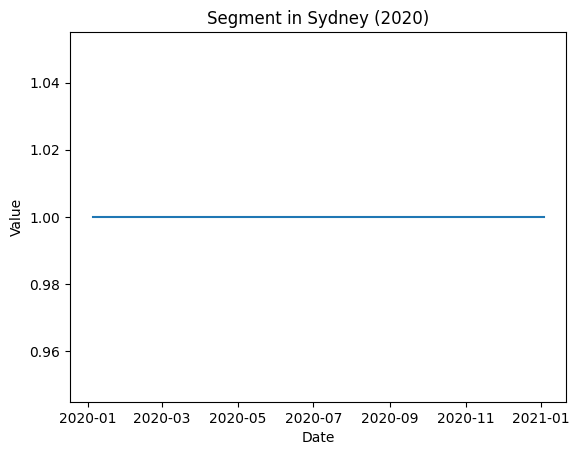

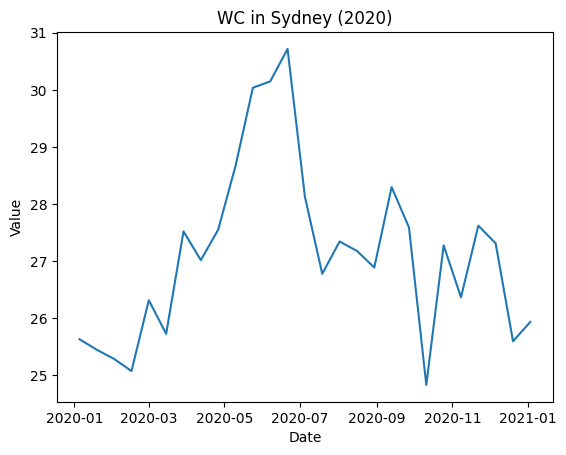

In [175]:
each_city_each_year_each_stat_vis(dataframes_to_vis, columns_to_vis, '2W')

In [190]:
# Each column(bars and lines) for all the cities per one year, half a year, 4 months and 3 month for 4 years

def each_city_all_years_each_stat(dataframes_vis, columns_keep, columns_vis, period):

    # create an empty dict which will contain concated dataframes
    dataframes_concated = {}

    # for each city we have
    for city in cities:
        # create list which will contain all dataframes from the current city
        city_list = []
        # add all dataframes from the current city to the list
        for key, value in dataframes_vis.items():
            if key[:-5] == city:
                city_list.append(value)

        # concatenate all dataframes from the current city
        df = city_list[0]
        for i in range(1, len(city_list)):
            df = pd.concat([df, city_list[i]])

        # reset indexes
        df.reset_index(drop=True, inplace=True)
        # add dataframe to dictionary of concatenated dataframes
        dataframes_concated[city] = df

    # keep mandatory columns
    dataframes_concated_copy = dataframes_concated
    for key, value in dataframes_concated_copy.items():
        df = value.loc[:, columns_keep]
        dataframes_concated[key] = df

    # visualization
    for key, value in dataframes_concated.items():
        df = value
        # for each column we want to visualize
        for column in columns_vis:
            # create a dataframe with this column and date column
            df_to_vis = df[['utc_datetime_str', column]]
            # set 'date' column as the index
            df_to_vis.set_index('utc_datetime_str', inplace=True)
            # convert index to datetime index
            df_to_vis.index = pd.to_datetime(df_to_vis.index)

            # create new dataframe with mean values grouped by date
            df_to_vis_grouped = df_to_vis.resample(period).mean()

            # if week numbers instead of dates are needed
            # df_to_vis_grouped['week_number'] = df_to_vis_grouped.index.week // 2 + 1
            # df_to_vis_grouped = df_to_vis_grouped[['week_number', column]] # reorder columns

            # create a new figure and axis object for each plot
            fig, ax = plt.subplots()

            # plot the data on the current axis
            ax.plot(df_to_vis_grouped[column], linestyle='solid')

            # set the title and axis labels
            ax.set_title(f'{column} in {key.capitalize()}')
            ax.set_xlabel('Date')
            ax.set_ylabel(column)

            # rotate the x-tick labels by 45 degrees
            plt.xticks(rotation=45)

            # create a new figure and axis object for each plot
            fig, ax = plt.subplots()

            # create a bar plot with the data
            ax.bar(df_to_vis_grouped.index, df_to_vis_grouped[column], width=10)

            # set the title and axis labels
            ax.set_title(f'{column} in {key.capitalize()}')
            ax.set_xlabel('Date')
            ax.set_ylabel(column)

            # rotate the x-tick labels by 45 degrees
            plt.xticks(rotation=45)

            # display the plot
            plt.show()


/var/folders/q7/0s4jjvb94hb_2_90j2545plw0000gn/T/ipykernel_2454/75759111.py:40: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_to_vis_grouped['week_number'] = df_to_vis_grouped.index.week // 2 + 1


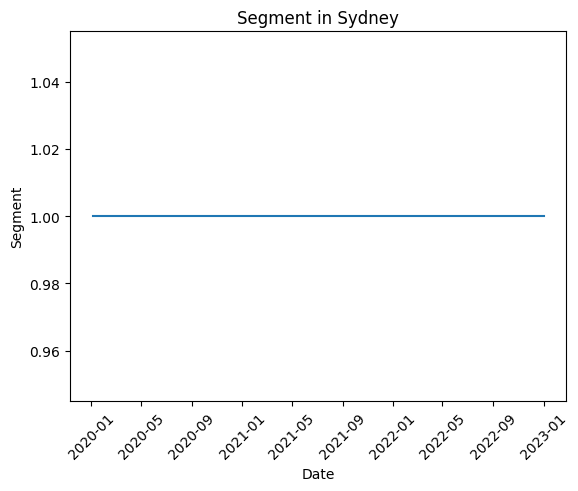

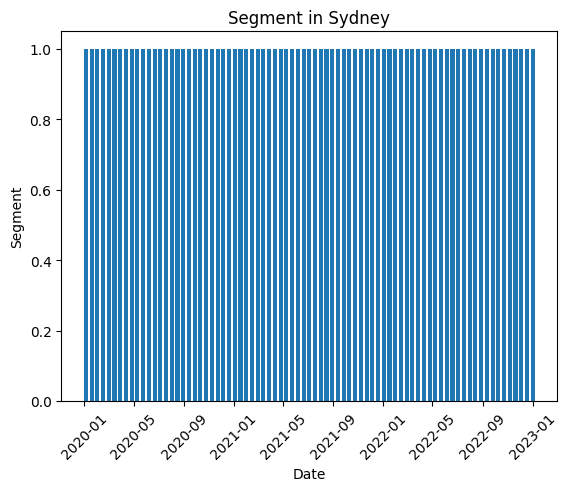

/var/folders/q7/0s4jjvb94hb_2_90j2545plw0000gn/T/ipykernel_2454/75759111.py:40: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_to_vis_grouped['week_number'] = df_to_vis_grouped.index.week // 2 + 1


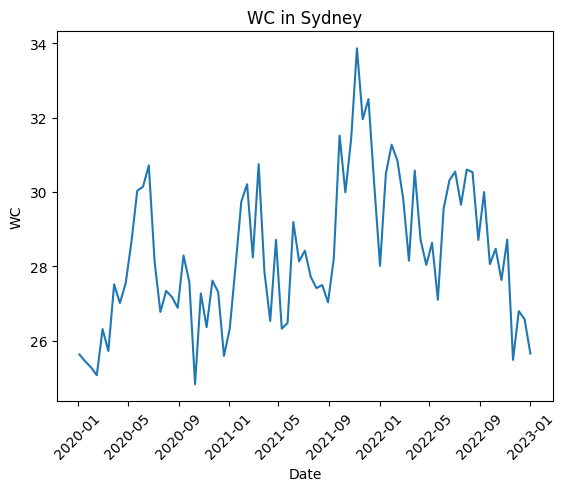

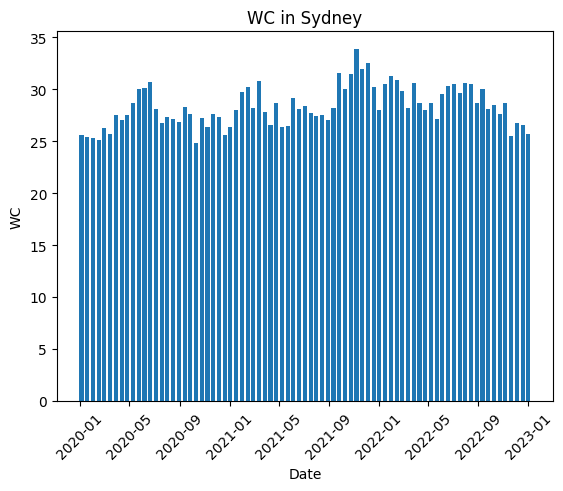

In [191]:
each_city_all_years_each_stat(dataframes_to_vis, columns_to_keep, columns_to_vis, '2W')